# Changing Directory

In [3]:
os.chdir(r"C:\CLV Dataset")


In [5]:
import os
print(os.listdir(r'C:\CLV Dataset'))

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


# Importing libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import sklearn


# Data Collection

In [9]:
customers = pd.read_csv('olist_customers_dataset.csv')
location= pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
seller= pd.read_csv('olist_sellers_dataset.csv')
category= pd.read_csv('product_category_name_translation.csv')


# Data Exploration

In [11]:
customers.info()
location.info()
orders.info()
payments.info()
order_items.info()
products.info()
reviews.info()
seller.info()
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [13]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [27]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Standardize Data Type

In [34]:
# Convert date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# Handle missing values
orders.dropna(subset=['order_approved_at'], inplace=True)

# Remove duplicates
orders.drop_duplicates(inplace=True)

# Inspect the cleaned data
orders.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


# Feature Engineering

## RFM metrics 

In [126]:
# Merge orders with customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

# Merge with order items to get price information
orders_items = pd.merge(orders_customers, order_items[['order_id', 'price']], on='order_id', how='inner')

# Set reference date as one day after the latest purchase
reference_date = orders_items['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer_id to calculate RFM metrics
rfm = orders_items.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']


# Calculate Average order value
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

# Display the RFM table
print(rfm.head())

                        customer_id  Recency  Frequency  Monetary     AOV
0  00012a2ce6f8dcda20d059ce98491703      293          1     89.80   89.80
1  000161a058600d5901f007fab4c27140      414          1     54.90   54.90
2  0001fd6190edaaf884bcaf3d49edf079      552          1    179.99  179.99
3  0002414f95344307404f0ace7a26f1d5      383          1    149.90  149.90
4  000379cdec625522490c315e70c7a9fb      154          1     93.00   93.00


## Customer Tenure

In [38]:
# Calculate first and last purchase dates
customer_purchase_dates = orders_items.groupby('customer_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()

# Calculate tenure in days
customer_purchase_dates['Tenure'] = (customer_purchase_dates['max'] - customer_purchase_dates['min']).dt.days

# Merge tenure into RFM DataFrame
rfm = rfm.merge(customer_purchase_dates[['customer_id', 'Tenure']], on='customer_id', how='left')

print(rfm.head())

                        customer_id  Recency  Frequency  Monetary     AOV  \
0  00012a2ce6f8dcda20d059ce98491703      293          1     89.80   89.80   
1  000161a058600d5901f007fab4c27140      414          1     54.90   54.90   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    179.99  179.99   
3  0002414f95344307404f0ace7a26f1d5      383          1    149.90  149.90   
4  000379cdec625522490c315e70c7a9fb      154          1     93.00   93.00   

   Tenure  
0       0  
1       0  
2       0  
3       0  
4       0  


# Customer Segmentation 
 ## Based on Frequency to group the customers into one-time and repeated buyer

In [40]:
# Assuming 'rfm' DataFrame contains 'customer_id' and 'Frequency'
rfm['Customer_Segment'] = rfm['Frequency'].apply(lambda x: 'Repeat Buyer' if x > 1 else 'One-time Buyer')
rfm

,customer_id,Recency,Frequency,Monetary,AOV,Tenure,Customer_Segment
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,89.80,0,One-time Buyer
1,000161a058600d5901f007fab4c27140,414,1,54.90,54.90,0,One-time Buyer
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,179.99,0,One-time Buyer
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,149.90,0,One-time Buyer
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,93.00,0,One-time Buyer
...,...,...,...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,171,1,78.00,78.00,0,One-time Buyer
98648,fffecc9f79fd8c764f843e9951b11341,158,1,54.90,54.90,0,One-time Buyer
98649,fffeda5b6d849fbd39689bb92087f431,104,1,47.90,47.90,0,One-time Buyer
98650,ffff42319e9b2d713724ae527742af25,82,1,199.90,199.90,0,One-time Buyer


 ## Assign scores from 1 to 5 for each RFM metric, with 5 being the best.

In [42]:

# Assign scores based on quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

#joining scores 
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

,customer_id,Recency,Frequency,Monetary,AOV,Tenure,Customer_Segment,R_Score,F_Score,M_Score,RFM_Segment
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,89.80,0,One-time Buyer,2,1,3,213
1,000161a058600d5901f007fab4c27140,414,1,54.90,54.90,0,One-time Buyer,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,179.99,0,One-time Buyer,1,1,5,115
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,149.90,0,One-time Buyer,2,1,4,214
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,93.00,0,One-time Buyer,4,1,3,413
...,...,...,...,...,...,...,...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,171,1,78.00,78.00,0,One-time Buyer,4,5,3,453
98648,fffecc9f79fd8c764f843e9951b11341,158,1,54.90,54.90,0,One-time Buyer,4,5,2,452
98649,fffeda5b6d849fbd39689bb92087f431,104,1,47.90,47.90,0,One-time Buyer,4,5,2,452
98650,ffff42319e9b2d713724ae527742af25,82,1,199.90,199.90,0,One-time Buyer,5,5,5,555


## Segment Mapping

In [44]:
def segment_map(segment):
    if segment == '555':
        return 'Champions'
    elif segment[0] == '5':
        return 'Loyal Customers'
    elif segment[1] == '5':
        return 'Frequent Buyers'
    elif segment[2] == '5':
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Segment'].apply(segment_map)
rfm

,customer_id,Recency,Frequency,Monetary,AOV,Tenure,Customer_Segment,R_Score,F_Score,M_Score,RFM_Segment,Segment
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,89.80,0,One-time Buyer,2,1,3,213,Others
1,000161a058600d5901f007fab4c27140,414,1,54.90,54.90,0,One-time Buyer,1,1,2,112,Others
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,179.99,0,One-time Buyer,1,1,5,115,Big Spenders
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,149.90,0,One-time Buyer,2,1,4,214,Others
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,93.00,0,One-time Buyer,4,1,3,413,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
98647,fffcb937e9dd47a13f05ecb8290f4d3e,171,1,78.00,78.00,0,One-time Buyer,4,5,3,453,Frequent Buyers
98648,fffecc9f79fd8c764f843e9951b11341,158,1,54.90,54.90,0,One-time Buyer,4,5,2,452,Frequent Buyers
98649,fffeda5b6d849fbd39689bb92087f431,104,1,47.90,47.90,0,One-time Buyer,4,5,2,452,Frequent Buyers
98650,ffff42319e9b2d713724ae527742af25,82,1,199.90,199.90,0,One-time Buyer,5,5,5,555,Champions


## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initializing the scaler
scaler = StandardScaler()

# Fit and transform the RFM features
rfm_scaled = scaler.fit_transform(rfm_features)


## K-Means Clustering

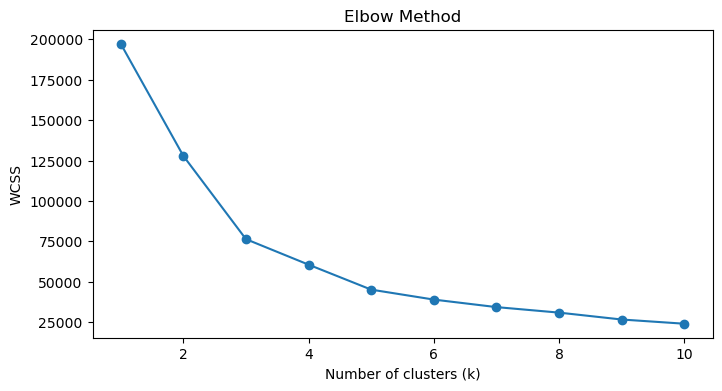

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [52]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and predict cluster labels
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


## Characteristics of clustering

In [54]:
# Calculate mean RFM values and customer count for each cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Customer Count'}).reset_index()

print(cluster_analysis)


   Cluster     Recency  Frequency     Monetary  Customer Count
0        0  395.349788        1.0   102.817681           40050
1        1  134.282087        1.0   101.970172           53526
2        2  240.809471        1.0   651.078676            4540
3        3  244.615672        1.0  1974.202444             536


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Features and target
features = ['Recency', 'Frequency', 'Monetary', 'Tenure']
X = rfm[features]
y = rfm['Monetary']  # Assuming Monetary represents CLV

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.410737590593574
RMSE: 49.372534264658576


## Visualizing K-Means Clusters
## 2D scatter Plot of Clusters

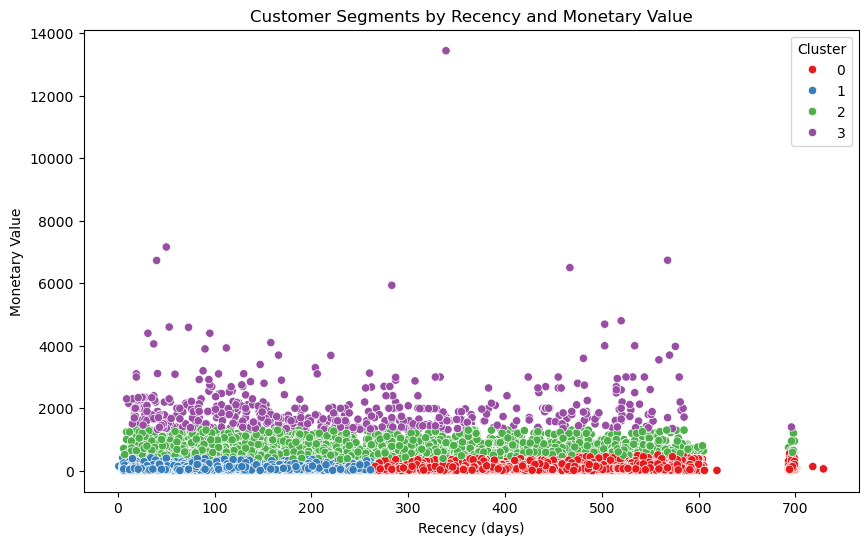

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rfm' is your DataFrame with 'Cluster', 'Recency', and 'Monetary' columns
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Recency and Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()


## Churn Analysis

In [128]:
# Load datasets
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])
order_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# Merge orders with customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

# Merge with order items to get product details
orders_full = pd.merge(orders_customers, order_items, on='order_id', how='left')

from datetime import timedelta

# Calculate the most recent purchase date in the dataset
latest_purchase_date = orders_full['order_purchase_timestamp'].max()

# Calculate the last purchase date for each customer
last_purchase = orders_full.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
last_purchase.columns = ['customer_id', 'last_purchase_date']

# Calculate days since last purchase
last_purchase['days_since_last_purchase'] = (latest_purchase_date - last_purchase['last_purchase_date']).dt.days

# Define churn: 1 if days_since_last_purchase > 180, else 0
last_purchase['churn'] = last_purchase['days_since_last_purchase'].apply(lambda x: 1 if x > 180 else 0)

# Merge churn data with orders_full
orders_full = pd.merge(orders_full, last_purchase[['customer_id', 'churn']], on='customer_id', how='left')

# Churn rate by customer state
churn_by_state = orders_full.groupby('customer_state')['churn'].mean().reset_index().sort_values(by='churn', ascending=False)

# Display the churn rate by state
print(churn_by_state)


   customer_state     churn
0              AC  0.793478
3              AP  0.792683
1              AL  0.786996
9              MA  0.780987
20             RO  0.778169
13             PA  0.776037
5              CE  0.761264
19             RN  0.759398
16             PI  0.746324
8              GO  0.743819
24             SE  0.743590
18             RJ  0.741837
23             SC  0.740300
22             RS  0.737917
14             PB  0.735974
10             MG  0.731543
26             TO  0.731013
4              BA  0.730699
11             MS  0.729697
7              ES  0.729682
12             MT  0.728990
2              AM  0.728916
15             PE  0.725414
17             PR  0.718680
6              DF  0.696819
21             RR  0.692308
25             SP  0.684400


# Churn Distribution Overview
## 1. Churn Overall Rate

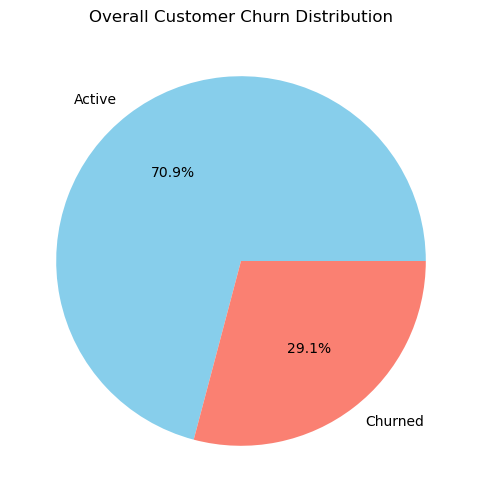

In [84]:
import matplotlib.pyplot as plt

# Assuming 'last_purchase' DataFrame has a 'churn' column
churn_counts = last_purchase['churn'].value_counts()
labels = ['Active', 'Churned']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Overall Customer Churn Distribution')
plt.show()


## 2.Churn Rate by Customer State

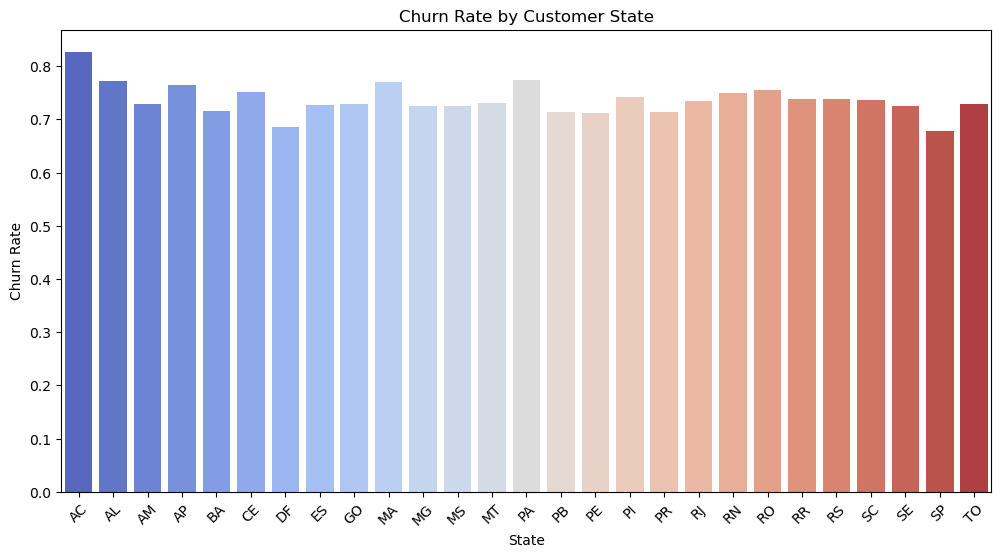

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'churn_by_state' is your DataFrame with 'customer_state' and 'churn' columns
plt.figure(figsize=(12, 6))
sns.barplot(data=churn_by_state, x='customer_state', y='churn', hue='customer_state', palette='coolwarm', legend=False)
plt.title('Churn Rate by Customer State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


# CLV Prediction Visualization
## 1)Actual vs. Predicted CLV Scatter Plot

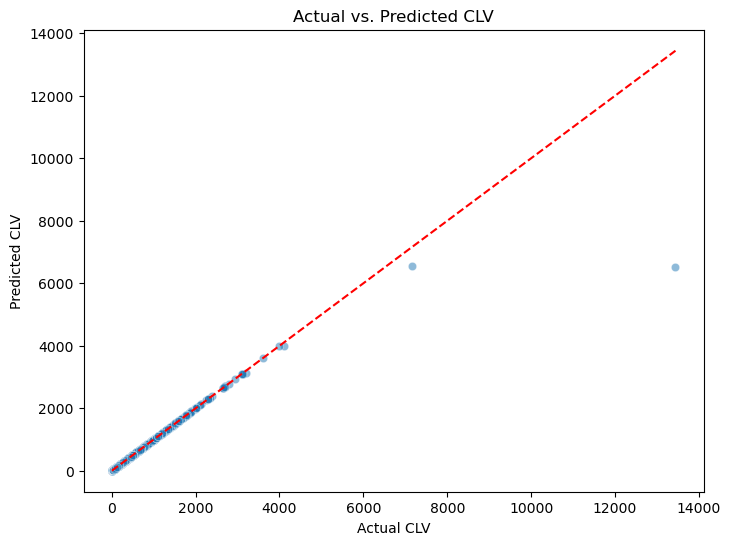

In [152]:
# Assuming 'y_test' and 'y_pred' are your actual and predicted CLV values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()


## 2)Feature Importance in CLV Prediction

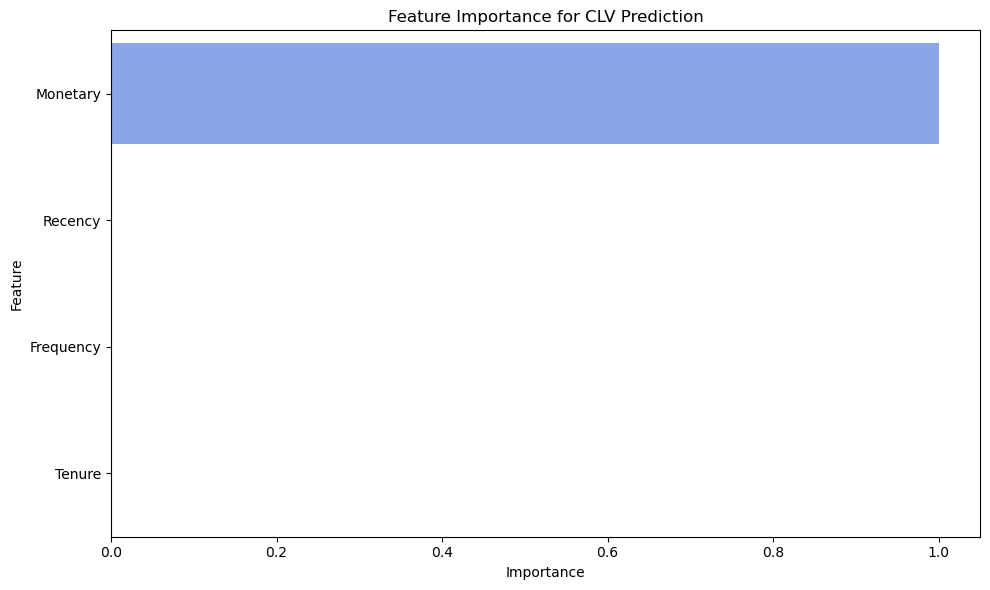

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Series to a DataFrame
feature_df = feature_importance.reset_index()
feature_df.columns = ['Feature', 'Importance']

# Create the barplot with 'Feature' as both y-axis and hue
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_df,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Feature Importance for CLV Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
